In [ ]:
# @title weather prediction using hybrid model


In [ ]:
import pandas as pd
df = pd.read_csv('Amaravati.csv')
print(df.head())

   Unnamed: 0                       date  temperature_2m  \
0           0  2010-01-01 00:00:00+00:00       21.032500   
1           1  2010-01-01 01:00:00+00:00       20.682499   
2           2  2010-01-01 02:00:00+00:00       21.332499   
3           3  2010-01-01 03:00:00+00:00       24.232500   
4           4  2010-01-01 04:00:00+00:00       26.232500   

   relative_humidity_2m  dew_point_2m  apparent_temperature  precipitation  \
0              94.60370     20.132500             24.118227            0.0   
1              95.47321     19.932499             23.653326            0.0   
2              94.61563     20.432499             24.711240            0.0   
3              79.36173     20.432499             27.749224            0.0   
4              66.63635     19.532500             29.228657            0.0   

   rain  snowfall  snow_depth  ...  surface_pressure  cloud_cover  \
0   0.0       0.0         0.0  ...        1010.23400         24.9   
1   0.0       0.0         0.0  .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112768 entries, 0 to 112767
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            112768 non-null  int64  
 1   date                  112768 non-null  object 
 2   temperature_2m        112768 non-null  float64
 3   relative_humidity_2m  112768 non-null  float64
 4   dew_point_2m          112768 non-null  float64
 5   apparent_temperature  112768 non-null  float64
 6   precipitation         112768 non-null  float64
 7   rain                  112768 non-null  float64
 8   snowfall              112768 non-null  float64
 9   snow_depth            112768 non-null  float64
 10  pressure_msl          112768 non-null  float64
 11  surface_pressure      112768 non-null  float64
 12  cloud_cover           112768 non-null  float64
 13  cloud_cover_low       112768 non-null  float64
 14  cloud_cover_mid       112768 non-null  float64
 15  

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0              0
date                    0
temperature_2m          0
relative_humidity_2m    0
dew_point_2m            0
apparent_temperature    0
precipitation           0
rain                    0
snowfall                0
snow_depth              0
pressure_msl            0
surface_pressure        0
cloud_cover             0
cloud_cover_low         0
cloud_cover_mid         0
cloud_cover_high        0
wind_speed_10m          0
wind_speed_100m         0
wind_direction_10m      0
wind_direction_100m     0
wind_gusts_10m          0
dtype: int64


In [ ]:
# Summary statistics of numerical columns
df.describe()

,Unnamed: 0,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.0,112768.0,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000,112768.000000
mean,56383.500000,28.369904,69.805385,21.456773,32.042625,0.122060,0.122060,0.0,0.0,1008.135583,1005.739657,35.158034,11.705227,19.613153,46.532855,8.916288,14.936086,181.729435,182.714242,20.519907
std,32553.461915,4.579269,19.907328,3.364977,4.917839,0.590537,0.590537,0.0,0.0,4.816996,4.788057,29.309270,22.029137,27.420455,43.692019,4.256052,6.663285,83.688576,82.263674,9.565860
min,0.000000,12.482500,9.698077,0.163000,11.849825,0.000000,0.000000,0.0,0.0,993.200000,990.820560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881386,0.868040,1.080000
25%,28191.750000,25.432499,55.318312,19.432499,29.171015,0.000000,0.000000,0.0,0.0,1004.200000,1001.809270,9.300000,0.000000,0.000000,0.000000,5.804825,10.009036,122.905240,124.508580,12.959999
50%,56383.500000,28.082499,73.293870,22.232500,32.202243,0.000000,0.000000,0.0,0.0,1008.100000,1005.732585,30.000002,2.000000,8.000000,39.000000,8.209263,14.707222,170.537750,171.869980,19.440000
75%,84575.250000,31.063000,86.940078,24.063000,35.053334,0.000000,0.000000,0.0,0.0,1012.100000,1009.672360,52.500000,12.000000,26.000000,97.000000,11.525623,19.523155,255.068530,255.425740,26.280000
max,112767.000000,45.932503,100.000000,27.782500,49.257020,18.600000,18.600000,0.0,0.0,1021.600000,1019.140400,100.000000,100.000000,100.000000,100.000000,36.829250,57.712387,360.000000,360.000000,74.520004


In [ ]:
# Check if the expected 'Date' column exists in your dataset by viewing all of the column names
print(df.columns)

# If the column name is different then update it to 'Date' by uncommenting the code below
# Replace 'actual_date_column_name' with the actual name of the column in your CSV
# df = df.rename(columns={'actual_date_column_name': 'Date'})

# Convert 'Date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the 'Date' column as the index
df.set_index('date', inplace=True)


Index(['Unnamed: 0', 'date', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')


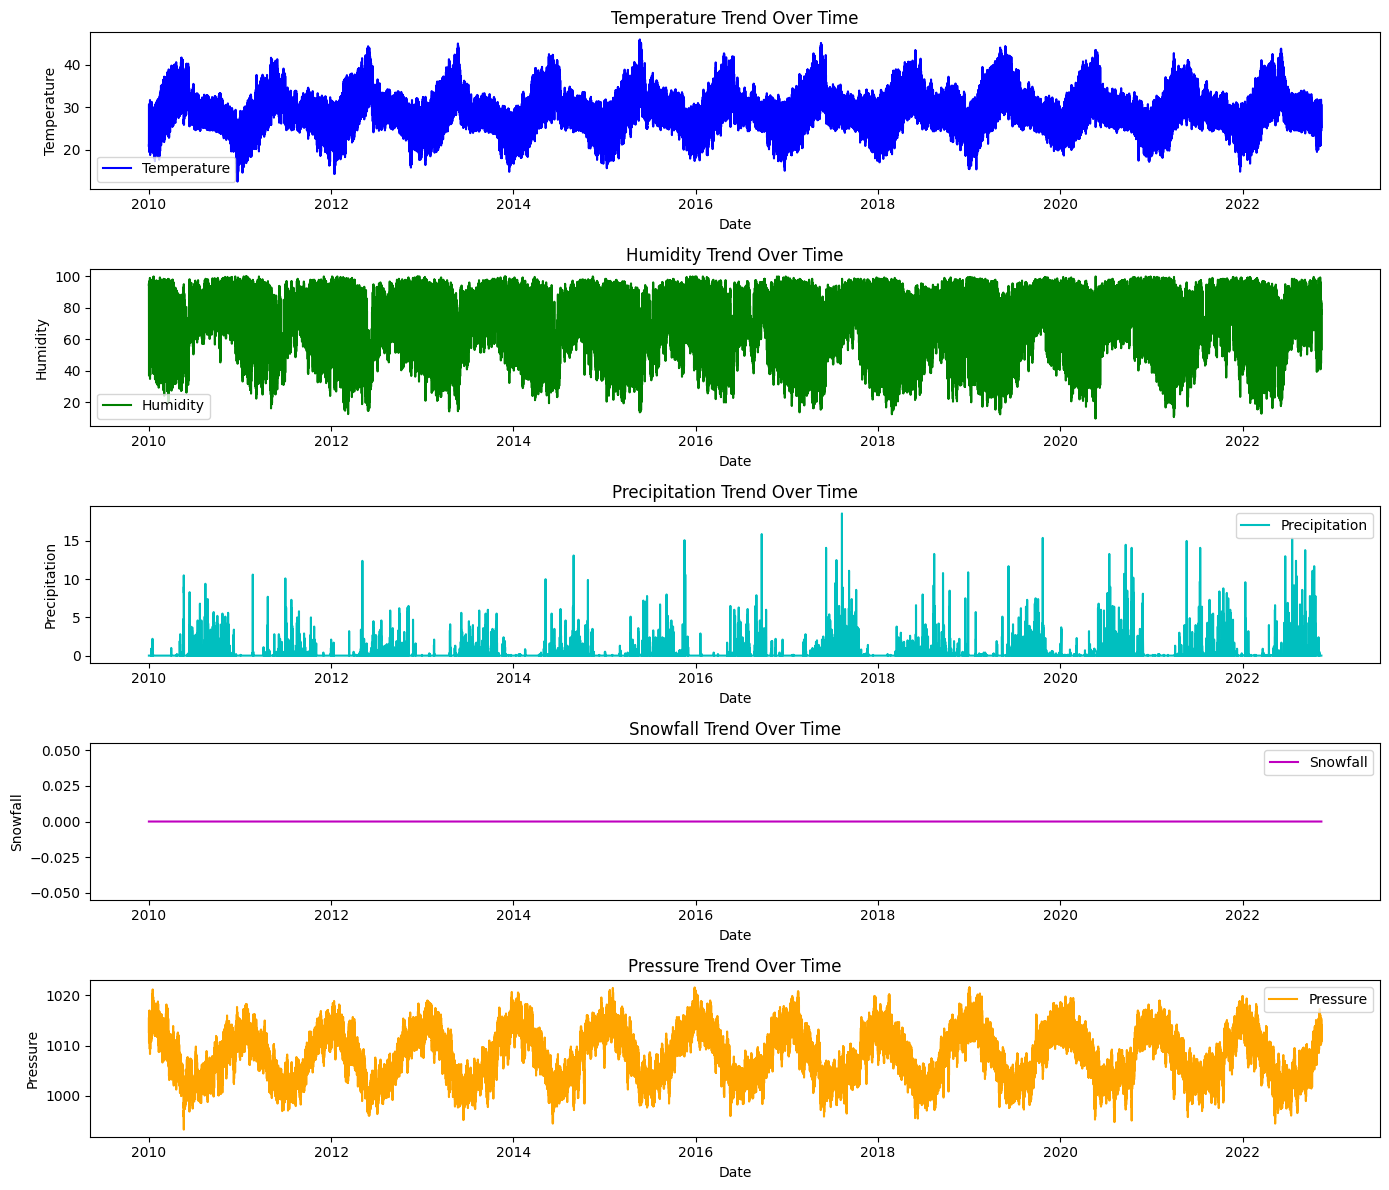

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot for each target variable
plt.figure(figsize=(14, 12))

# Temperature Plot
plt.subplot(5, 1, 1)
plt.plot(df.index, df['temperature_2m'], label='Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Trend Over Time')
plt.legend()

# Humidity Plot
plt.subplot(5, 1, 2)
plt.plot(df.index, df['relative_humidity_2m'], label='Humidity', color='g')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Trend Over Time')
plt.legend()

# Precipitation Plot
plt.subplot(5, 1, 3)
plt.plot(df.index, df['precipitation'], label='Precipitation', color='c')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Trend Over Time')
plt.legend()

# Snowfall Plot
plt.subplot(5, 1, 4)
plt.plot(df.index, df['snowfall'], label='Snowfall', color='m')
plt.xlabel('Date')
plt.ylabel('Snowfall')
plt.title('Snowfall Trend Over Time')
plt.legend()

# Pressure Plot
plt.subplot(5, 1, 5)
plt.plot(df.index, df['pressure_msl'], label='Pressure', color='orange')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Pressure Trend Over Time')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

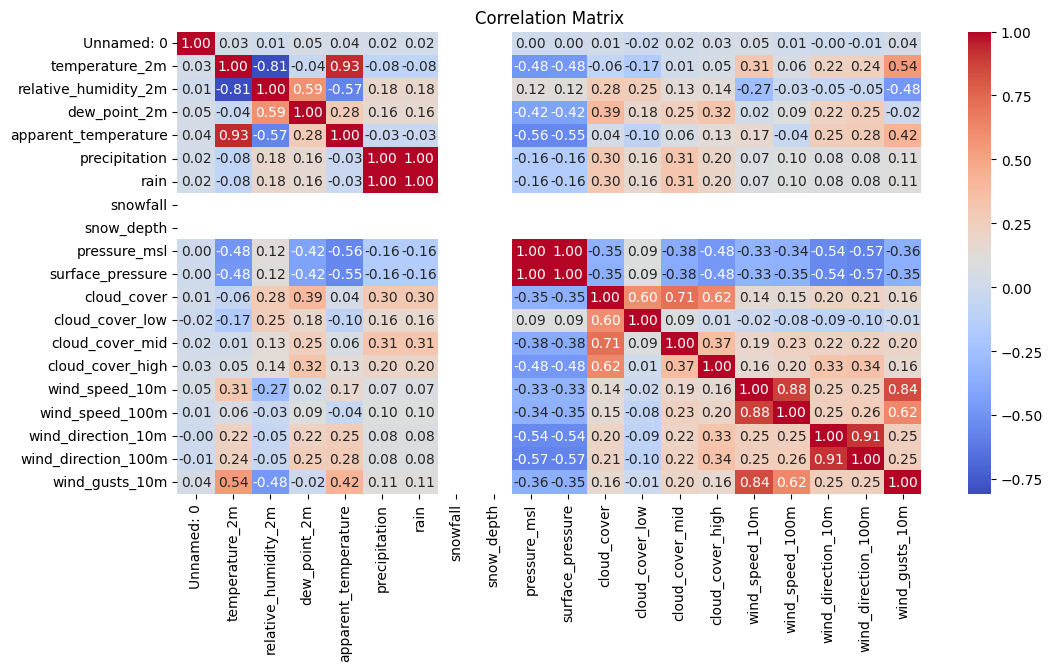

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# to calculate the correlation
correlation_matrix = df.corr()

#to create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" formats the annotations to 2 decimal places
plt.title("Correlation Matrix")
plt.show()

Outliers in temperature_2m:
date
2010-04-01 09:00:00+00:00    39.582500
2010-04-01 10:00:00+00:00    39.782500
2010-04-01 11:00:00+00:00    39.632500
2010-04-10 08:00:00+00:00    39.632500
2010-04-10 09:00:00+00:00    39.832500
                               ...    
2022-06-10 07:00:00+00:00    39.663002
2022-06-10 08:00:00+00:00    40.463000
2022-06-10 09:00:00+00:00    40.713000
2022-06-10 10:00:00+00:00    40.463000
2022-06-10 11:00:00+00:00    40.113000
Name: temperature_2m, Length: 1969, dtype: float64
Outliers in relative_humidity_2m:
Series([], Name: relative_humidity_2m, dtype: float64)
Outliers in precipitation:
date
2010-01-09 17:00:00+00:00    0.2
2010-01-09 19:00:00+00:00    0.9
2010-01-09 20:00:00+00:00    0.8
2010-01-09 21:00:00+00:00    0.1
2010-01-09 22:00:00+00:00    0.2
                            ... 
2022-11-04 11:00:00+00:00    0.1
2022-11-04 12:00:00+00:00    0.5
2022-11-04 13:00:00+00:00    0.1
2022-11-05 04:00:00+00:00    0.1
2022-11-05 05:00:00+00:00    0.2
Nam

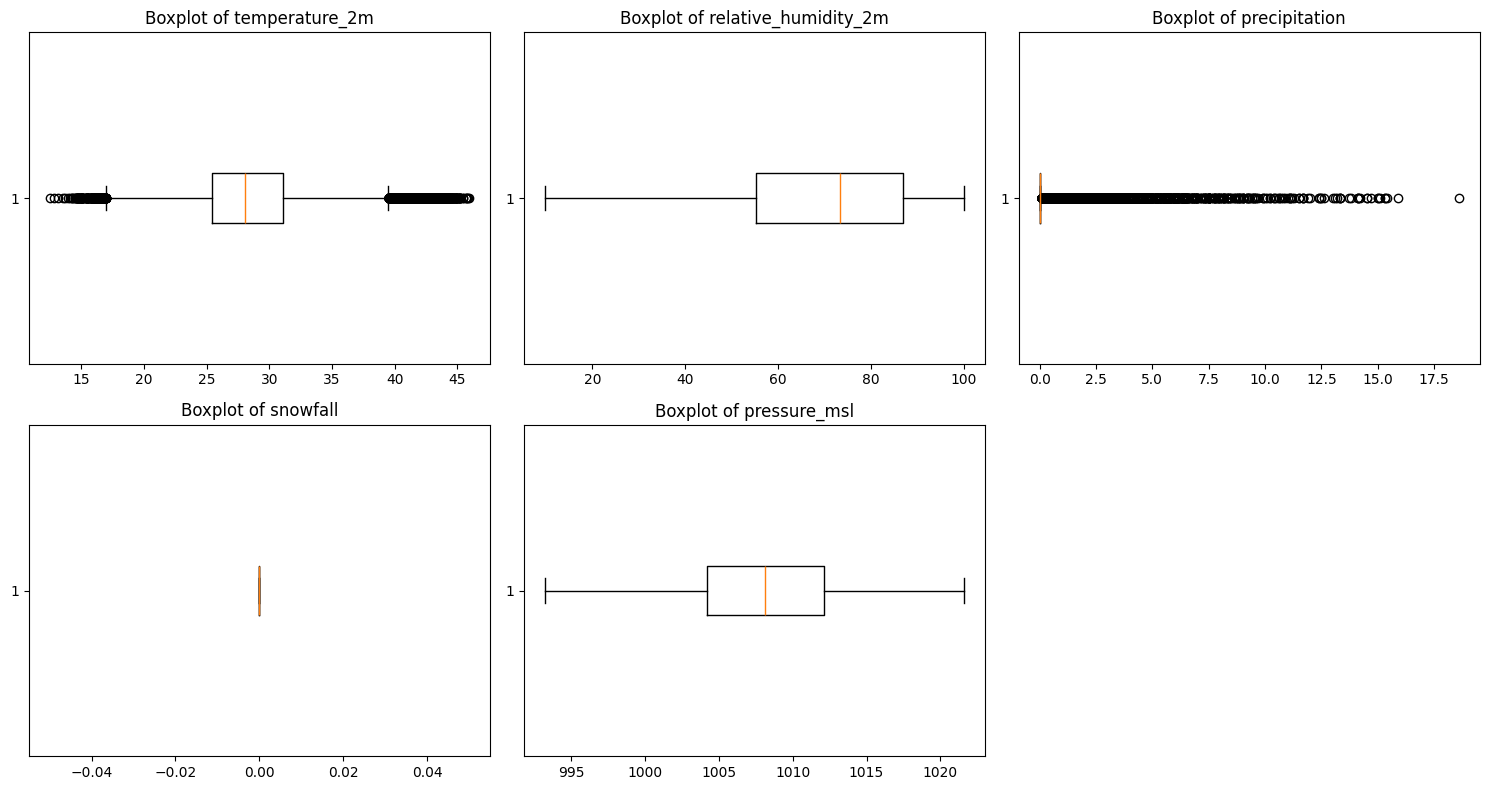

In [ ]:
data_selected = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'snowfall', 'pressure_msl']]

#to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Outliers in {column}:\n{outliers[column]}")
    return outliers

# Detect and display outliers
outliers = detect_outliers_iqr(data_selected)

# boxplots to visualize outliers
plt.figure(figsize=(15, 8))
for i, column in enumerate(data_selected.columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data_selected[column].dropna(), vert=False)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd



#to Select relevant columns for target variables
selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'snowfall', 'pressure_msl']
df = df[selected_columns]

# Function to remove outliers based on the IQR method for the new parameters
def remove_outliers_iqr(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # trimming
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# calling function remove_outliers
df_cleaned = remove_outliers_iqr(df)

# to display the outliers
print("Shape after outlier removal:", df_cleaned.shape)
print(df_cleaned.head())


Shape after outlier removal: (94605, 5)
                           temperature_2m  relative_humidity_2m  \
date                                                              
2010-01-01 00:00:00+00:00       21.032500              94.60370   
2010-01-01 01:00:00+00:00       20.682499              95.47321   
2010-01-01 02:00:00+00:00       21.332499              94.61563   
2010-01-01 03:00:00+00:00       24.232500              79.36173   
2010-01-01 04:00:00+00:00       26.232500              66.63635   

                           precipitation  snowfall  pressure_msl  
date                                                              
2010-01-01 00:00:00+00:00            0.0       0.0        1012.7  
2010-01-01 01:00:00+00:00            0.0       0.0        1013.2  
2010-01-01 02:00:00+00:00            0.0       0.0        1014.2  
2010-01-01 03:00:00+00:00            0.0       0.0        1015.1  
2010-01-01 04:00:00+00:00            0.0       0.0        1015.6  


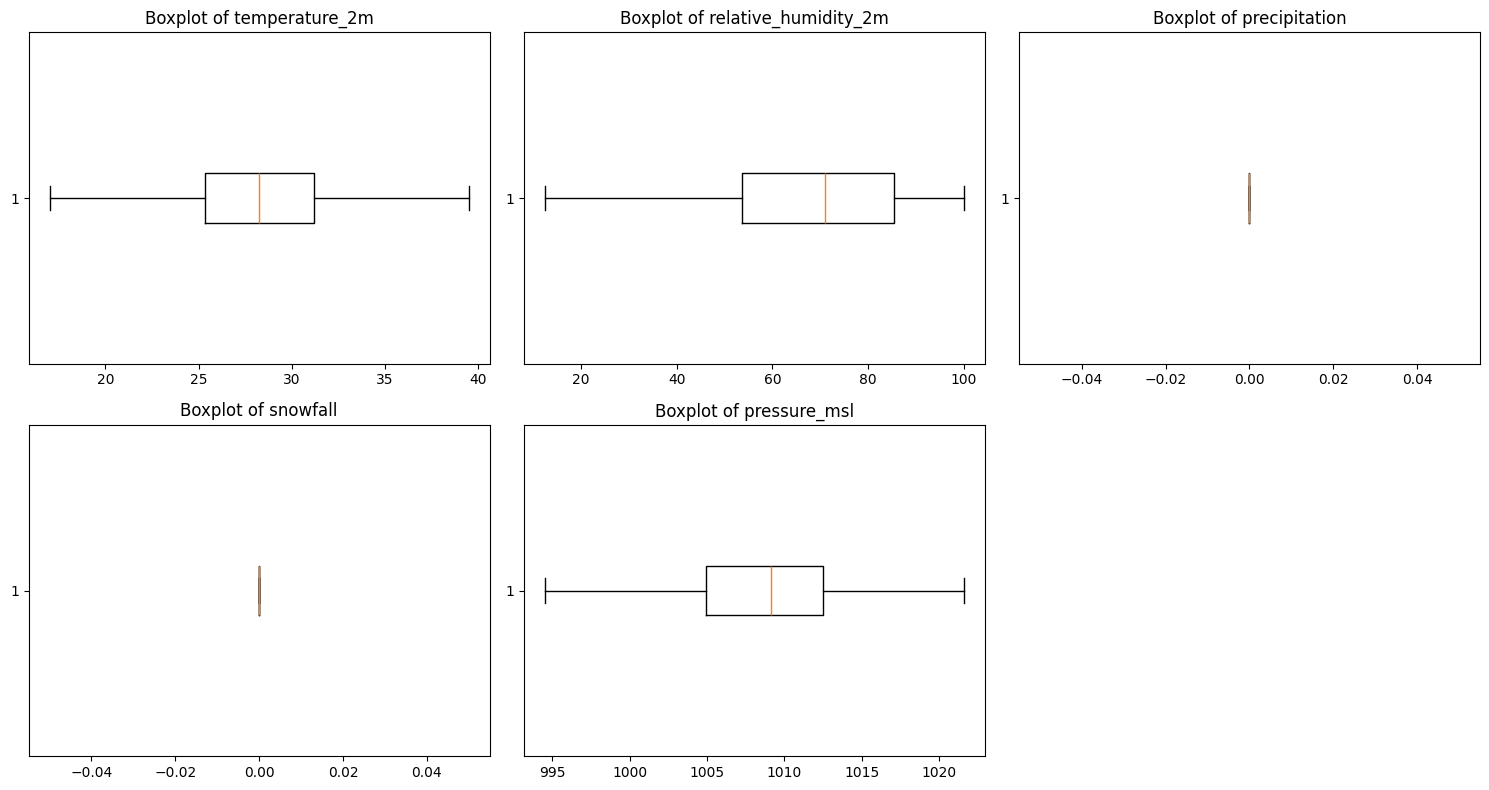

In [ ]:
#boxplots to visualize outliers
plt.figure(figsize=(15, 8))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df_cleaned[column].dropna(), vert=False)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_cleaned.ffill(inplace=True)

# Step 3: Scaling
feature_scaler = MinMaxScaler()
scaled_data = feature_scaler.fit_transform(df_cleaned)

# Step 4: Sequence Generation for LSTM
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])  # Predicting the next step for each sequence
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 30  # Adjust based on the dataset's time scale
X, y = create_sequences(scaled_data, sequence_length)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (75660, 30, 5)
Shape of y_train: (75660, 5)
Shape of X_test: (18915, 30, 5)
Shape of y_test: (18915, 5)


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store model performance
model_performance = {}

# Flatten X_train and X_test for regression models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# Function to train and evaluate a regression model
def train_and_evaluate(model, model_name):
    model.fit(X_train_flat, y_train)
    y_pred = model.predict(X_test_flat)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

# Apply Linear Regression
linear_model = train_and_evaluate(LinearRegression(), 'Linear Regression')

# Apply Lasso Regression (you can tune the alpha parameter)
lasso_model = train_and_evaluate(Lasso(alpha=0.1), 'Lasso Regression')

# Display the model performance summary
print("\nModel Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2']:.4f}")


Linear Regression - MSE: 0.0006, R2 Score: 0.9855


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - MSE: 0.0240, R2 Score: 0.4000

Model Performance Summary:
Linear Regression - MSE: 0.0006, R2 Score: 0.9855
Lasso Regression - MSE: 0.0240, R2 Score: 0.4000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 105s 42ms/step - loss: 0.0089 - val_loss: 9.5337e-04
Epoch 2/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 124s 35ms/step - loss: 9.0667e-04 - val_loss: 9.1975e-04
Epoch 3/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 149s 38ms/step - loss: 7.2359e-04 - val_loss: 6.8985e-04
Epoch 4/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 96s 41ms/step - loss: 6.8931e-04 - val_loss: 6.3463e-04
Epoch 5/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - loss: 6.4981e-04 - val_loss: 6.1673e-04
Epoch 6/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - loss: 6.4295e-04 - val_loss: 6.3499e-04
Epoch 7/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 100s 39ms/step - loss: 6.2646e-04 - val_loss: 6.9864e-04
Epoch 8/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 146s 41ms/step - loss: 6.2515e-04 - val_loss: 5.9415e-04
Epoch 9/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 91s 38ms/step - loss: 5.9759e-04 - val_loss: 5.9913e-04
Epoch 10/10
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 163s 47ms/step - loss: 6.0142e-04 - val_loss: 5.9472e-04


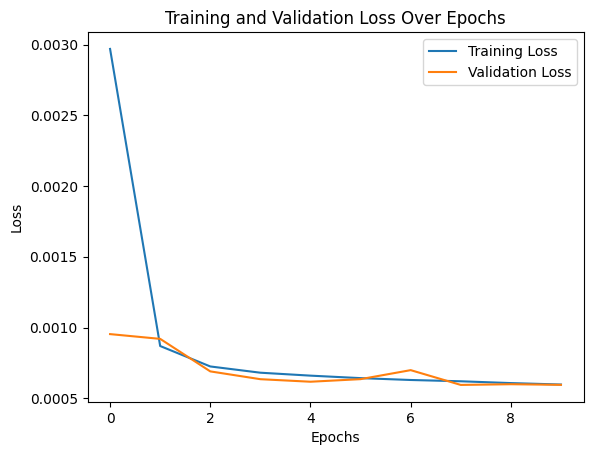

592/592 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
LSTM Model - MSE: 0.0006, R2 Score: 0.5862


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the LSTM model architecture
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(32),
    Dense(y_train.shape[1])  # Output layer with the number of target variables
])

# to put with adam wiht loss fucntion of mse
model.compile(optimizer='adam', loss='mse')

#training the model with lstm
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# to plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

#to predit the test output
y_pred = model.predict(X_test)

# model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LSTM Model - MSE: {mse:.4f}, R2 Score: {r2:.4f}")


592/592 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


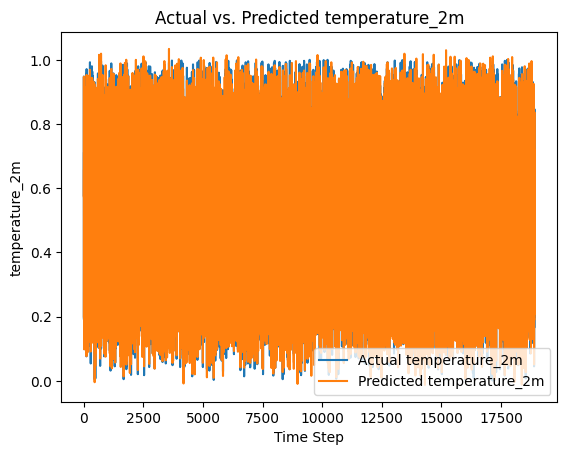

First 10 predicted temperature_2m values:
[0.20043254 0.6624366  0.2507399  0.9473155  0.44513336 0.5719765
 0.43857574 0.6583253  0.37115642 0.59539294]




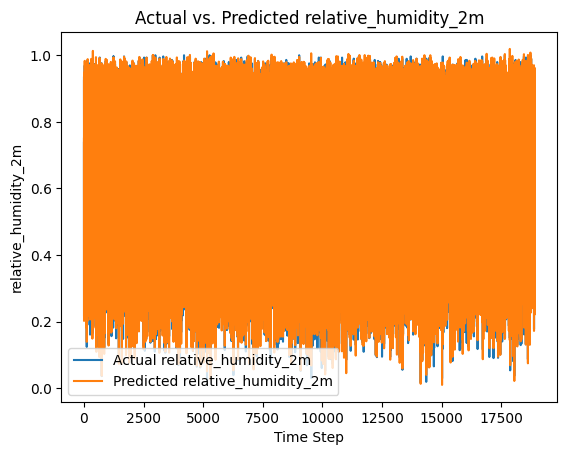

First 10 predicted relative_humidity_2m values:
[0.74926996 0.5279355  0.9263078  0.20208201 0.81685257 0.5853821
 0.8986044  0.68048346 0.92287606 0.5199862 ]




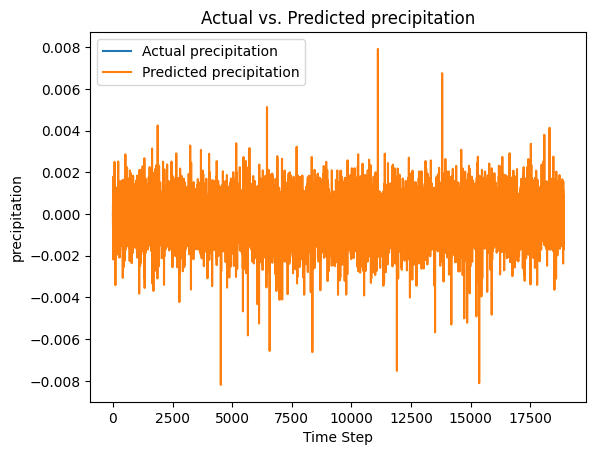

First 10 predicted precipitation values:
[-2.58609653e-05 -5.13497740e-04  4.90441918e-04 -6.24366105e-04
 -1.21325254e-04 -6.11804426e-04  6.95545226e-04 -1.52736157e-03
  7.93375075e-05 -1.65759027e-03]




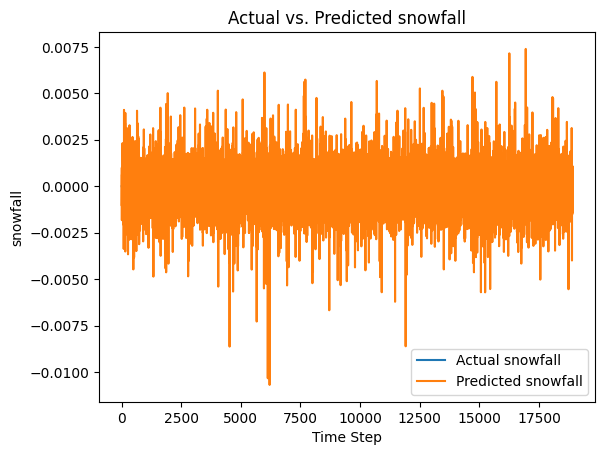

First 10 predicted snowfall values:
[-9.9963136e-04 -9.1938302e-05 -5.7258643e-04 -3.9066933e-04
  1.3898872e-04  9.9933334e-04  9.6478872e-04 -1.8279571e-03
 -1.5947409e-04  2.6097707e-04]




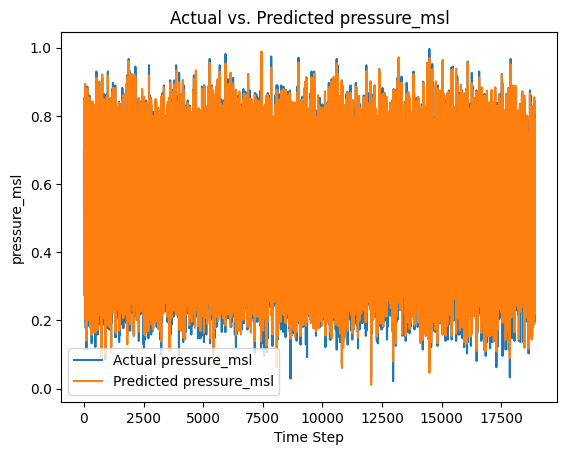

First 10 predicted pressure_msl values:
[0.69211245 0.41207382 0.63648516 0.5236405  0.53783906 0.27418593
 0.5112356  0.33434027 0.6294288  0.44234732]




In [ ]:
# to predict the output
y_pred = model.predict(X_test)

# storing each parameter separtatly
temperature_pred = y_pred[:, 0]
humidity_pred = y_pred[:, 1]
precipitation_pred = y_pred[:, 2]
snowfall_pred = y_pred[:, 3]
pressure_pred = y_pred[:, 4]


# dictionary to store the predictions
predictions = {
    'temperature_2m': temperature_pred,
    'relative_humidity_2m': humidity_pred,
    'precipitation': precipitation_pred,
    'snowfall': snowfall_pred,
    'pressure_msl': pressure_pred
}

# for each parameter prediction
for variable, pred_values in predictions.items():
    plt.figure()
    plt.plot(y_test[:, selected_columns.index(variable)], label=f'Actual {variable}')
    plt.plot(pred_values, label=f'Predicted {variable}')
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Actual vs. Predicted {variable}')
    plt.legend()
    plt.show()

    # to print the first 10 predicted values for the current variable
    print(f"First 10 predicted {variable} values:")
    print(pred_values[:10])
    print("\n")


592/592 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


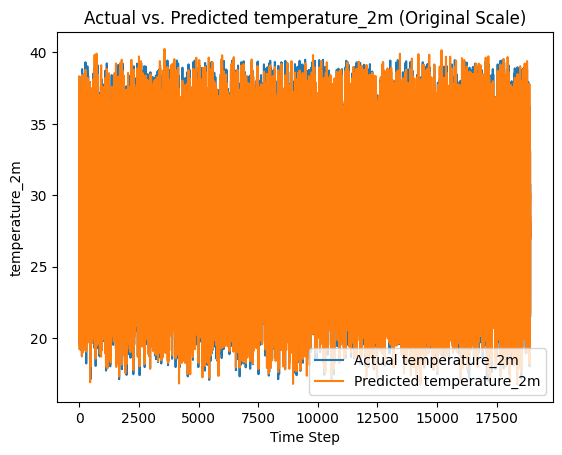

First 10 predicted temperature_2m values (Original Scale):
[21.516619 31.89762  22.647001 38.29871  27.014925 29.865026 26.867577
 31.80524  25.3527   30.391182]




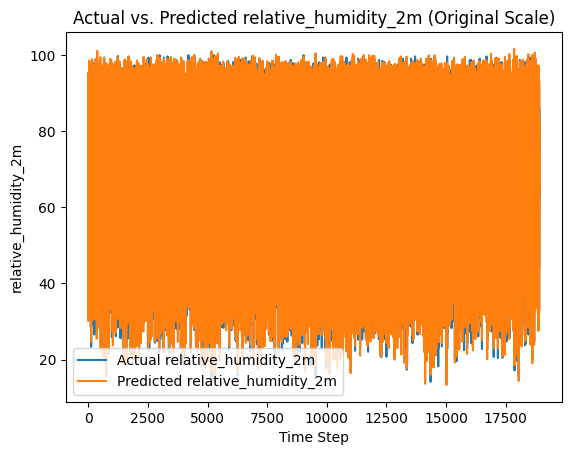

First 10 predicted relative_humidity_2m values (Original Scale):
[78.04915  58.671818 93.548416 30.144077 83.96586  63.701138 91.12304
 72.02705  93.24798  57.975876]




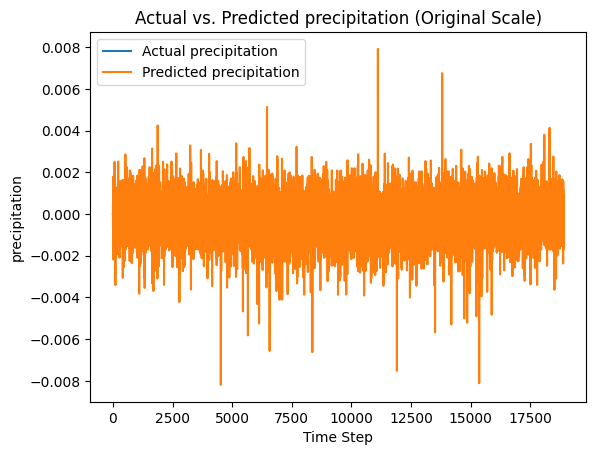

First 10 predicted precipitation values (Original Scale):
[-2.58609653e-05 -5.13497740e-04  4.90441918e-04 -6.24366105e-04
 -1.21325254e-04 -6.11804426e-04  6.95545226e-04 -1.52736157e-03
  7.93375075e-05 -1.65759027e-03]




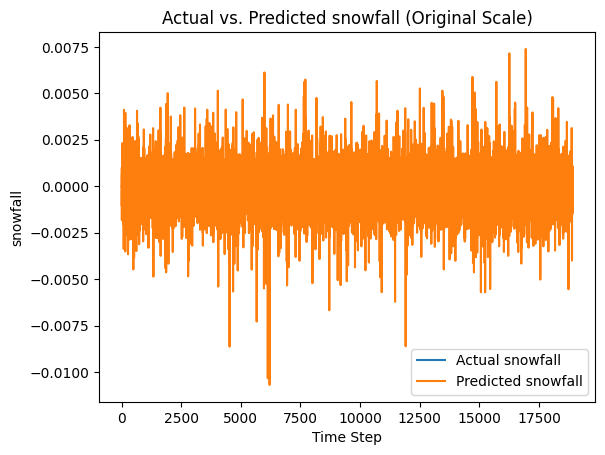

First 10 predicted snowfall values (Original Scale):
[-9.9963136e-04 -9.1938302e-05 -5.7258643e-04 -3.9066933e-04
  1.3898872e-04  9.9933334e-04  9.6478872e-04 -1.8279571e-03
 -1.5947409e-04  2.6097707e-04]




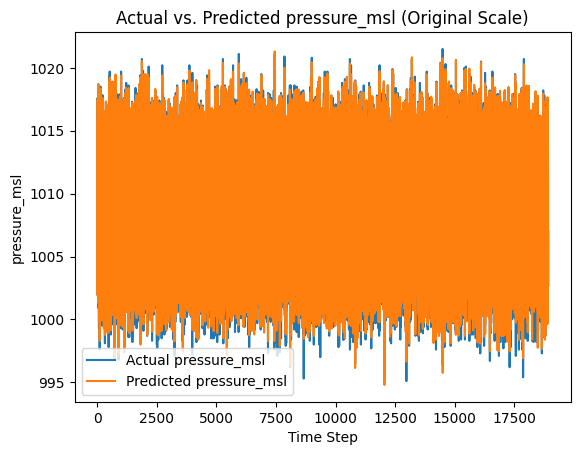

First 10 predicted pressure_msl values (Original Scale):
[1013.2563  1005.6672  1011.7487  1008.6907  1009.07544 1001.9305
 1008.3545  1003.5606  1011.55756 1006.48755]




In [ ]:
y_pred = model.predict(X_test)

# Inverse transformation
y_pred_original_scale = feature_scaler.inverse_transform(y_pred)

# Separate predictions for each target variable in the original scale
temperature_pred_original = y_pred_original_scale[:, 0]
humidity_pred_original = y_pred_original_scale[:, 1]
precipitation_pred_original = y_pred_original_scale[:, 2]
snowfall_pred_original = y_pred_original_scale[:, 3]
pressure_pred_original = y_pred_original_scale[:, 4]

# Create a dictionary to store the predictions in the original scale
predictions_original_scale = {
    'temperature_2m': temperature_pred_original,
    'relative_humidity_2m': humidity_pred_original,
    'precipitation': precipitation_pred_original,
    'snowfall': snowfall_pred_original,
    'pressure_msl': pressure_pred_original
}


# Iterate through the target variables and print predictions along with plots in the original scale
for variable, pred_values in predictions_original_scale.items():
    plt.figure()
    plt.plot(feature_scaler.inverse_transform(y_test)[:, selected_columns.index(variable)], label=f'Actual {variable}')
    plt.plot(pred_values, label=f'Predicted {variable}')
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Actual vs. Predicted {variable} (Original Scale)')
    plt.legend()
    plt.show()

    # Print the first 10 predicted values for the current variable in the original scale
    print(f"First 10 predicted {variable} values (Original Scale):")
    print(pred_values[:10])
    print("\n")

In [ ]:
# to implement xgboost

from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_flat, y_train)

#to predict output
y_pred_xgb = xgb_model.predict(X_test_flat)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb:.4f}, R2 Score: {r2_xgb:.4f}")

#model performance
model_performance['XGBoost'] = {'MSE': mse_xgb, 'R2': r2_xgb}

XGBoost Model - MSE: 0.0006, R2 Score: 0.5869


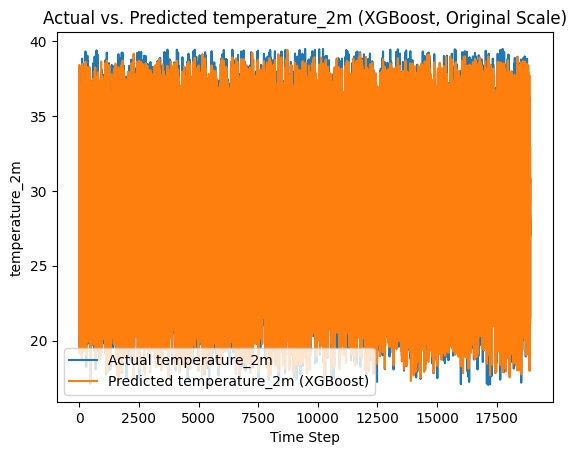

First 10 predicted temperature_2m values (XGBoost, Original Scale):
[21.354963 31.617508 22.861135 38.411278 27.322279 30.150612 26.890944
 31.95308  25.593359 30.723223]




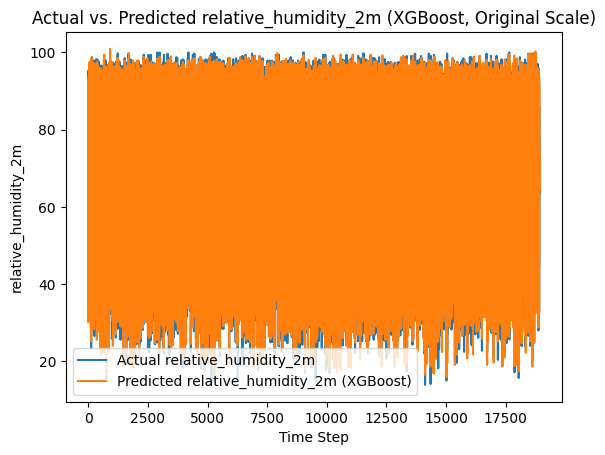

First 10 predicted relative_humidity_2m values (XGBoost, Original Scale):
[77.843925 58.22729  92.62573  30.115044 84.54544  64.53294  90.93414
 72.48704  91.40027  57.382816]




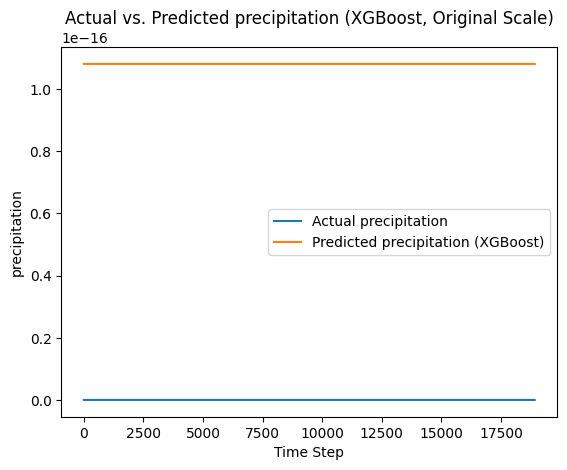

First 10 predicted precipitation values (XGBoost, Original Scale):
[1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16
 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16]




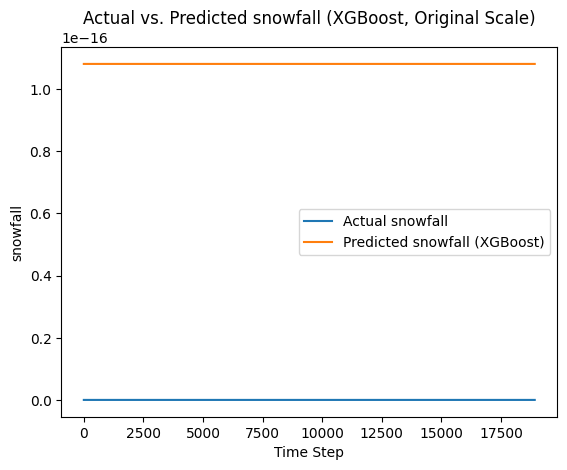

First 10 predicted snowfall values (XGBoost, Original Scale):
[1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16
 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16 1.0805324e-16]




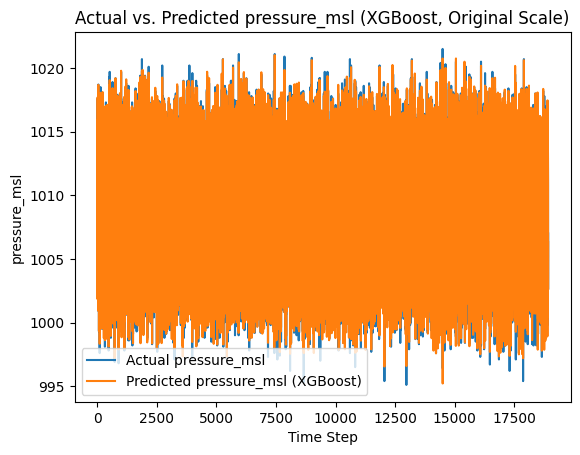

First 10 predicted pressure_msl values (XGBoost, Original Scale):
[1013.29517 1005.22876 1011.6319  1008.64954 1008.87976 1001.8555
 1008.3816  1003.5849  1011.2315  1005.9005 ]




In [ ]:
# predict the values baed on xgboost algorithm

# Inverse transform the scaled predictions back to the original scale for XGBoost
y_pred_xgb_original_scale = feature_scaler.inverse_transform(y_pred_xgb)


# Separate predictions for each target variable in the original scale for XGBoost
temperature_pred_xgb_original = y_pred_xgb_original_scale[:, 0]
humidity_pred_xgb_original = y_pred_xgb_original_scale[:, 1]
precipitation_pred_xgb_original = y_pred_xgb_original_scale[:, 2]
snowfall_pred_xgb_original = y_pred_xgb_original_scale[:, 3]
pressure_pred_xgb_original = y_pred_xgb_original_scale[:, 4]

#to store the XGBoost predictions in the original scale
predictions_xgb_original_scale = {
    'temperature_2m': temperature_pred_xgb_original,
    'relative_humidity_2m': humidity_pred_xgb_original,
    'precipitation': precipitation_pred_xgb_original,
    'snowfall': snowfall_pred_xgb_original,
    'pressure_msl': pressure_pred_xgb_original
}

# Iterate through the target variables and print XGBoost predictions along with plots in the original scale
for variable, pred_values in predictions_xgb_original_scale.items():
    plt.figure()
    plt.plot(feature_scaler.inverse_transform(y_test)[:, selected_columns.index(variable)], label=f'Actual {variable}')
    plt.plot(pred_values, label=f'Predicted {variable} (XGBoost)')
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Actual vs. Predicted {variable} (XGBoost, Original Scale)')
    plt.legend()
    plt.show()
    # to print the first 10 predicted values
    print(f"First 10 predicted {variable} values (XGBoost, Original Scale):")
    print(pred_values[:10])
    print("\n")

592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


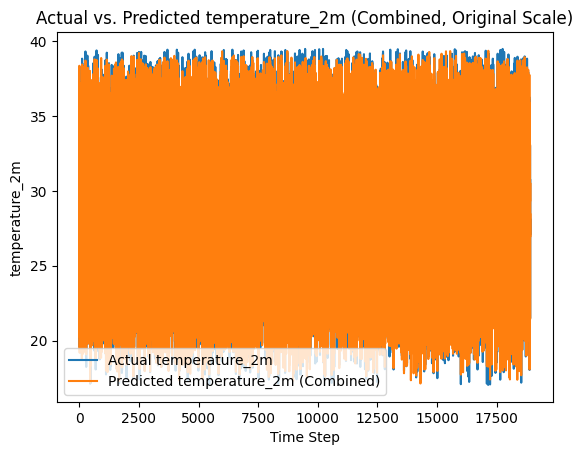

First 10 predicted temperature_2m values (Combined, Original Scale):
[21.435791 31.757563 22.754068 38.354992 27.1686   30.007818 26.87926
 31.879158 25.47303  30.557203]




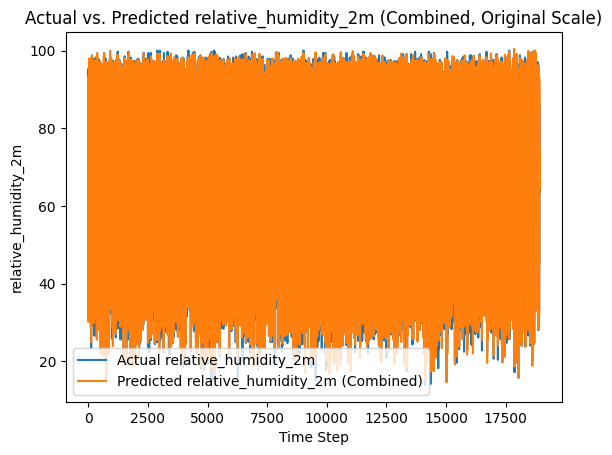

First 10 predicted relative_humidity_2m values (Combined, Original Scale):
[77.94654  58.44955  93.08707  30.12956  84.255646 64.11704  91.028595
 72.25704  92.32412  57.679348]




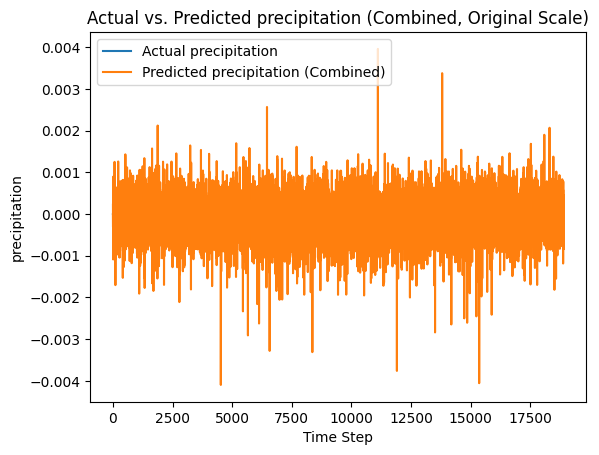

First 10 predicted precipitation values (Combined, Original Scale):
[-1.2930483e-05 -2.5674887e-04  2.4522096e-04 -3.1218305e-04
 -6.0662627e-05 -3.0590221e-04  3.4777261e-04 -7.6368079e-04
  3.9668754e-05 -8.2879514e-04]




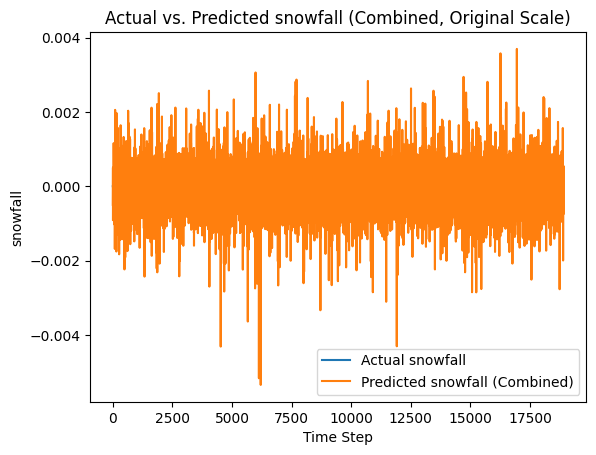

First 10 predicted snowfall values (Combined, Original Scale):
[-4.9981568e-04 -4.5969151e-05 -2.8629322e-04 -1.9533467e-04
  6.9494359e-05  4.9966667e-04  4.8239436e-04 -9.1397855e-04
 -7.9737045e-05  1.3048854e-04]




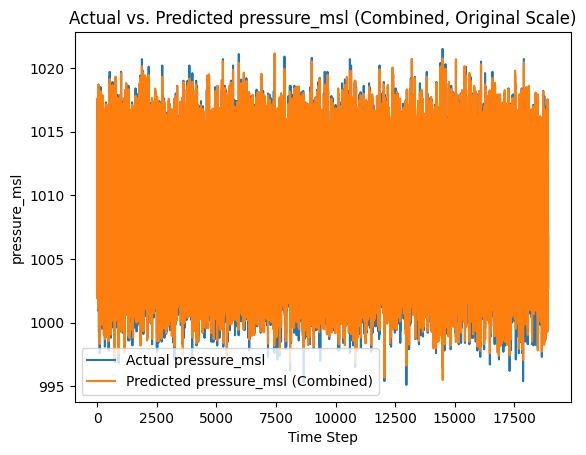

First 10 predicted pressure_msl values (Combined, Original Scale):
[1013.2757  1005.448   1011.6903  1008.6701  1008.97754 1001.89294
 1008.36804 1003.5728  1011.39453 1006.1941 ]


Combined Model (LSTM + XGBoost) - MSE: 0.0005, R2 Score: 0.5877

Model Performance Summary:
Linear Regression - MSE: 0.0006, R2 Score: 0.9855
Lasso Regression - MSE: 0.0240, R2 Score: 0.4000
XGBoost - MSE: 0.0006, R2 Score: 0.5869
Combined (LSTM + XGBoost) - MSE: 0.0005, R2 Score: 0.5877


In [ ]:
#combined model prediction

# Make predictions using the trained LSTM model
y_pred_lstm = model.predict(X_test)

# Inverse transform the scaled predictions
y_pred_lstm_original_scale = feature_scaler.inverse_transform(y_pred_lstm)

# Combine LSTM and XGBoost predictions by average of predicted values
y_pred_combined = (y_pred_lstm + y_pred_xgb) / 2

# Inverse transform the combined preiction
y_pred_combined_original_scale = feature_scaler.inverse_transform(y_pred_combined)
#storing separtely
temperature_pred_combined_original = y_pred_combined_original_scale[:, 0]
humidity_pred_combined_original = y_pred_combined_original_scale[:, 1]
precipitation_pred_combined_original = y_pred_combined_original_scale[:, 2]
snowfall_pred_combined_original = y_pred_combined_original_scale[:, 3]
pressure_pred_combined_original = y_pred_combined_original_scale[:, 4]

predictions_combined_original_scale = {
    'temperature_2m': temperature_pred_combined_original,
    'relative_humidity_2m': humidity_pred_combined_original,
    'precipitation': precipitation_pred_combined_original,
    'snowfall': snowfall_pred_combined_original,
    'pressure_msl': pressure_pred_combined_original
}


# to iterate through the target variables and print combined predictions along with plots in the original scale
for variable, pred_values in predictions_combined_original_scale.items():
    plt.figure()
    plt.plot(feature_scaler.inverse_transform(y_test)[:, selected_columns.index(variable)], label=f'Actual {variable}')
    plt.plot(pred_values, label=f'Predicted {variable} (Combined)')
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Actual vs. Predicted {variable} (Combined, Original Scale)')
    plt.legend()
    plt.show()

    # to print the first 10 predicted values for the current variable in the original scale for combined model
    print(f"First 10 predicted {variable} values (Combined, Original Scale):")
    print(pred_values[:10])
    print("\n")

# Evaluation
mse_combined = mean_squared_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)
print(f"Combined Model (LSTM + XGBoost) - MSE: {mse_combined:.4f}, R2 Score: {r2_combined:.4f}")

# storing in dict
model_performance['Combined (LSTM + XGBoost)'] = {'MSE': mse_combined, 'R2': r2_combined}
# model performance data
print("\nModel Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2']:.4f}")

In [ ]:
# Evaluate the LSTM model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
print(f"LSTM Model - MSE: {mse_lstm:.4f}, R2 Score: {r2_lstm:.4f}")
model_performance['LSTM'] = {'MSE': mse_lstm, 'R2': r2_lstm}

LSTM Model - MSE: 0.0006, R2 Score: 0.5862


In [ ]:
# to find best model over above
best_model = min(model_performance, key=lambda k: model_performance[k]['MSE'])
print("\nBest Model based on MSE and R2:")
print(f"The best performing model is: {best_model}")


Best Model based on MSE and R2:
The best performing model is: Combined (LSTM + XGBoost)


In [ ]:

# Display the model performance summary over all algo's
print("\nModel Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2']:.4f}")

# Find the model with the lowest MSE and highest R2 score
best_model = min(model_performance, key=lambda k: model_performance[k]['MSE'])
print("\nBest Model based on MSE and R2:")
print(f"The best performing model is: {best_model}")
# Get the best accuracy (R2 score) from the model performance dictionary
best_r2 = model_performance[best_model]['R2']
print(f"The best R2 score achieved is: {best_r2:.4f}")


Model Performance Summary:
Linear Regression - MSE: 0.0006, R2 Score: 0.9855
Lasso Regression - MSE: 0.0240, R2 Score: 0.4000
XGBoost - MSE: 0.0006, R2 Score: 0.5869
Combined (LSTM + XGBoost) - MSE: 0.0005, R2 Score: 0.5877
LSTM - MSE: 0.0006, R2 Score: 0.5862

Best Model based on MSE and R2:
The best performing model is: Combined (LSTM + XGBoost)
The best R2 score achieved is: 0.5877


In [ ]:
# to apply lstm+xgboost+linear regression algorithms combination
# Combine LSTM and XGBoost predictions (example: weighted average)
lstm_weight = 0.6  # Adjust weights as needed
xgb_weight = 0.4
y_pred_combined = (lstm_weight * y_pred_lstm) + (xgb_weight * y_pred_xgb)
#Linear Regression on combined predictions
linear_model_combined = LinearRegression()
linear_model_combined.fit(y_pred_combined,y_test)

y_pred_linear_combined = linear_model_combined.predict(y_pred_combined)

mse_linear_combined = mean_squared_error(y_test, y_pred_linear_combined)
r2_linear_combined = r2_score(y_test, y_pred_linear_combined)

print(f"Linear Regression on Combined Predictions Model - MSE: {mse_linear_combined:.4f}, R2 Score: {r2_linear_combined:.4f}")

#to add combined model performance to the dictionary
model_performance['Linear Regression on Combined Predictions'] = {'MSE': mse_linear_combined, 'R2': r2_linear_combined}

# to display the model performance summary
print("\nModel Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2']:.4f}")

# to find the model with the lowest MSE and highest R2 score
best_model = min(model_performance, key=lambda k: model_performance[k]['MSE'])

print("\nBest Model based on MSE and R2:")
print(f"The best performing model is: {best_model}")

Linear Regression on Combined Predictions Model - MSE: 0.0005, R2 Score: 0.9880

Model Performance Summary:
Linear Regression - MSE: 0.0006, R2 Score: 0.9855
Lasso Regression - MSE: 0.0240, R2 Score: 0.4000
XGBoost - MSE: 0.0006, R2 Score: 0.5869
Combined (LSTM + XGBoost) - MSE: 0.0005, R2 Score: 0.5877
LSTM - MSE: 0.0006, R2 Score: 0.5862
Linear Regression on Combined Predictions - MSE: 0.0005, R2 Score: 0.9880

Best Model based on MSE and R2:
The best performing model is: Linear Regression on Combined Predictions


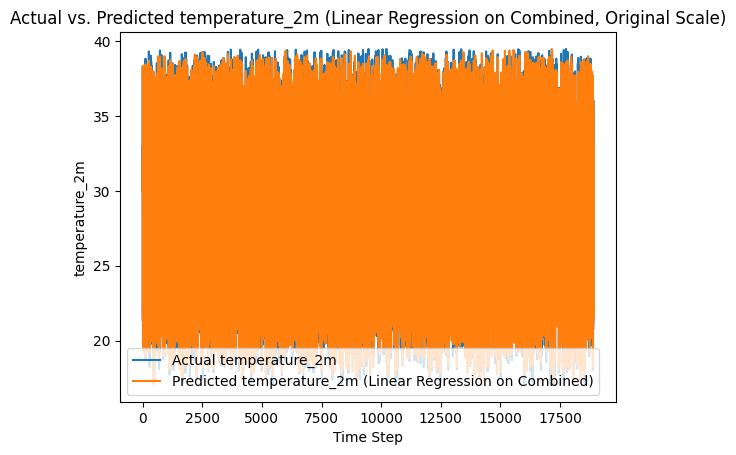

First 10 predicted temperature_2m values (Linear Regression on Combined, Original Scale):
[21.580137 31.83785  22.90436  38.354435 27.261816 29.994247 27.006313
 31.99123  25.611986 30.543976]




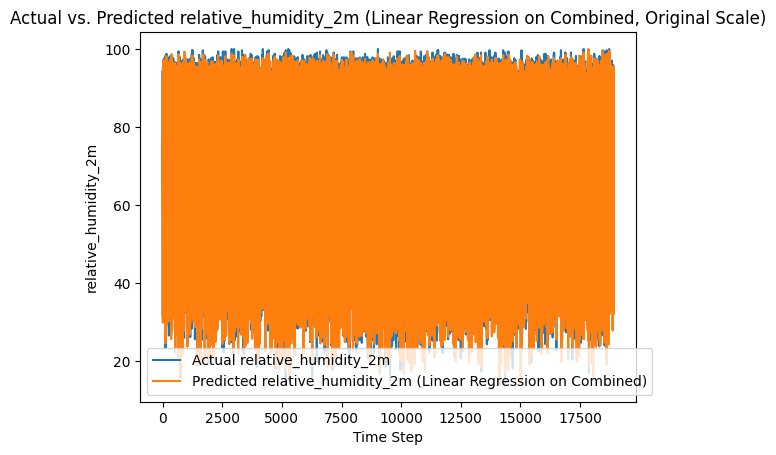

First 10 predicted relative_humidity_2m values (Linear Regression on Combined, Original Scale):
[77.458984 58.04128  92.421585 29.822733 83.50918  63.760326 90.406975
 71.200676 91.68673  57.37113 ]




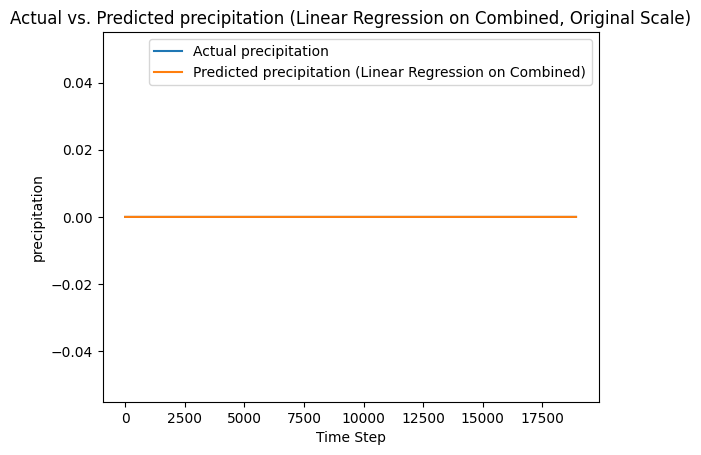

First 10 predicted precipitation values (Linear Regression on Combined, Original Scale):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]




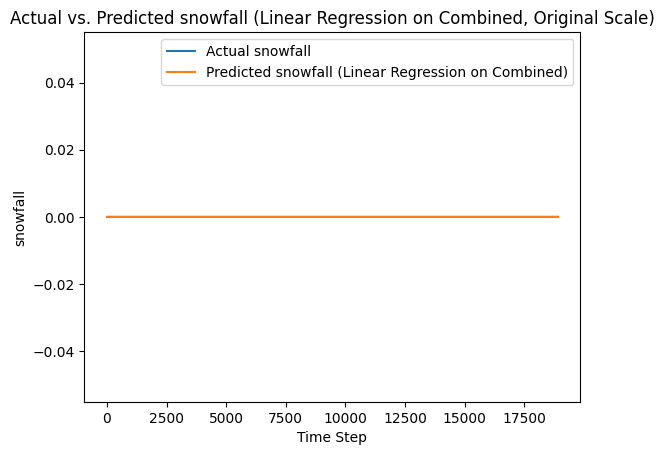

First 10 predicted snowfall values (Linear Regression on Combined, Original Scale):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]




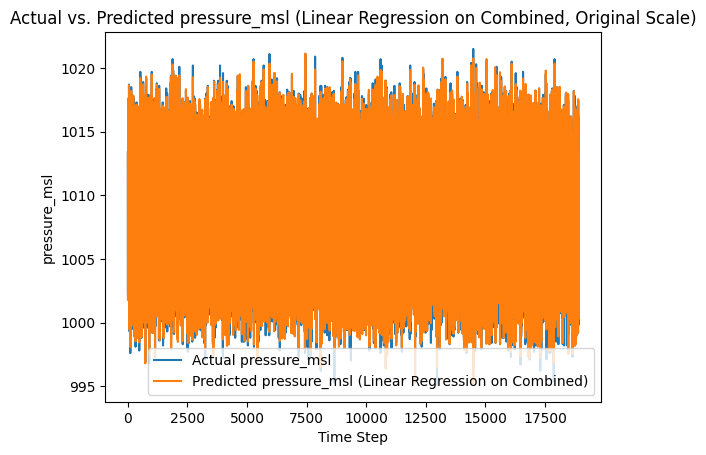

First 10 predicted pressure_msl values (Linear Regression on Combined, Original Scale):
[1013.2672  1005.33685 1011.70996 1008.4281  1008.927   1001.7644
 1008.3336  1003.37805 1011.38947 1006.07056]




In [ ]:
#the prediction outputs for various target variables which are taken based on lstm+xgboost+linear regression algorithm

# Assuming y_pred_linear_combined contains the predictions from the linear regression model applied to the combined predictions.
# Also assuming y_test is available and in the original scale.

# Inverse transform y_pred_linear_combined
y_pred_linear_combined_original_scale = feature_scaler.inverse_transform(y_pred_linear_combined)


# Separating predictions
temperature_pred_linear_combined_original = y_pred_linear_combined_original_scale[:, 0]
humidity_pred_linear_combined_original = y_pred_linear_combined_original_scale[:, 1]
precipitation_pred_linear_combined_original = y_pred_linear_combined_original_scale[:, 2]
snowfall_pred_linear_combined_original = y_pred_linear_combined_original_scale[:, 3]
pressure_pred_linear_combined_original = y_pred_linear_combined_original_scale[:, 4]


# to create a dictionary to store the linear regression on combined predictions in the original scale for iteration
predictions_linear_combined_original_scale = {
    'temperature_2m': temperature_pred_linear_combined_original,
    'relative_humidity_2m': humidity_pred_linear_combined_original,
    'precipitation': precipitation_pred_linear_combined_original,
    'snowfall': snowfall_pred_linear_combined_original,
    'pressure_msl': pressure_pred_linear_combined_original
}

# to iterate through the target variables and print predictions along with plots in the original scale for the linear regression model on combined predictions
for variable, pred_values in predictions_linear_combined_original_scale.items():
    plt.figure()
    plt.plot(feature_scaler.inverse_transform(y_test)[:, selected_columns.index(variable)], label=f'Actual {variable}')
    plt.plot(pred_values, label=f'Predicted {variable} (Linear Regression on Combined)')
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Actual vs. Predicted {variable} (Linear Regression on Combined, Original Scale)')
    plt.legend()
    plt.show()

    #to print the first 10 predicted values for the current variable
    print(f"First 10 predicted {variable} values (Linear Regression on Combined, Original Scale):")
    print(pred_values[:10])
    print("\n")